<a href="https://colab.research.google.com/github/e-saidha/House_Price_Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing house price dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing_dataset = fetch_california_housing(as_frame =True)
df = housing_dataset.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between the features of dataset

In [7]:
correlation =df.corr()

In [8]:
correlation.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650


<Axes: >

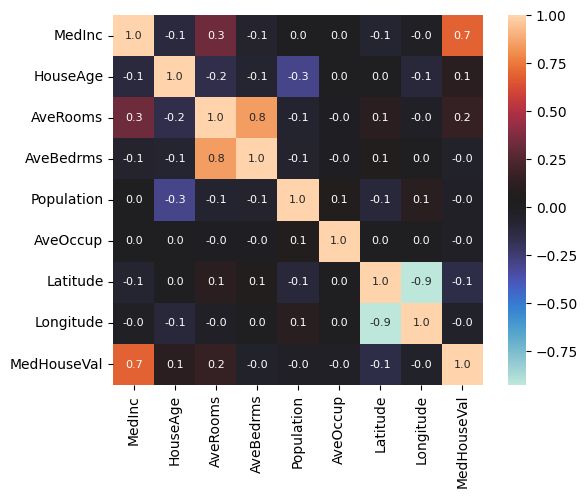

In [9]:
sns.heatmap(data = correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='icefire')


Splitting the data

In [10]:
X = df.drop('MedHouseVal',axis=1)

In [11]:
y=df['MedHouseVal']

In [12]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

In [15]:
model = XGBRegressor()

In [16]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [17]:
y_pred = model.predict(X_train)

In [18]:
score1 = metrics.r2_score(y_train,y_pred)
score2 = metrics.mean_absolute_error(y_train,y_pred)

In [19]:
print('R Squared error - ',score1)
print('Mean Absolute error - ',score2)

R Squared error -  0.9445725845802867
Mean Absolute error -  0.19257627556572793


Predictions on Test data

In [20]:
y_pred_test = model.predict(X_test)

In [21]:
score1_test = metrics.r2_score(y_test,y_pred_test)
score2_test = metrics.mean_absolute_error(y_test,y_pred_test)

In [22]:
print('R Squared error - ',score1_test)
print('Mean Absolute error - ',score2_test)

R Squared error -  0.8301370561019205
Mean Absolute error -  0.30957335413783094


Visualization

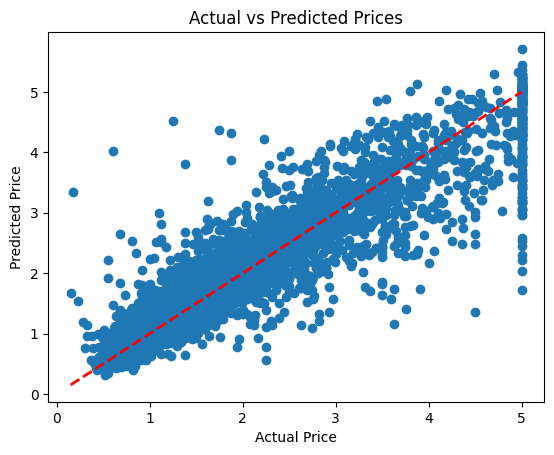

In [23]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)


In [24]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

In [25]:
df_results.head()

,Actual,Predicted
20046,0.47700,0.594452
3024,0.45800,0.784119
15663,5.00001,5.198116
20484,2.18600,2.439808
9814,2.78000,2.427432


Tuning the parameters for optimising XGBoost

In [26]:
from sklearn.model_selection import RandomizedSearchCV
model = XGBRegressor(objective ='reg:squarederror',random_state =42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}



In [27]:
search = RandomizedSearchCV(
    estimator= model,
    param_distributions=param_grid,
    n_iter =20,
    scoring ='r2',
    cv =3,
    random_state=42

)

In [28]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='r2')

In [29]:
print("Best parameters:", search.best_params_)
print("Best R2 score:", search.best_score_)

best_model = search.best_estimator_


Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best R2 score: 0.8377128038974427


In [30]:
y_pred_test = best_model.predict(X_test)

In [31]:
print("Test R2:", metrics.r2_score(y_test, y_pred_test))
print("Test MAE:", metrics.mean_absolute_error(y_test, y_pred_test))

Test R2: 0.8398000032881056
Test MAE: 0.30001369347740975


Predicting price using new data

In [37]:
new_data = pd.DataFrame([{
    'MedInc': 3.8,
    'HouseAge': 28.6,
    'AveRooms': 5.4,
    'AveBedrms': 1,
    'Population': 2000,
    'AveOccup': 3,
    'Latitude': 34.5,
    'Longitude': -119.2
}])


predicted_price = best_model.predict(new_data)


result = new_data.copy()
result['Predicted_MedHouseVal'] = predicted_price

print("🔹 Prediction result:")
display(result)

🔹 Prediction result:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Predicted_MedHouseVal
0,3.8,28.6,5.4,1,2000,3,34.5,-119.2,2.024113
